In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
data = pd.read_csv("D:\DS\Order Status Prediction\orders_data.csv")

In [3]:
data

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


<AxesSubplot:>

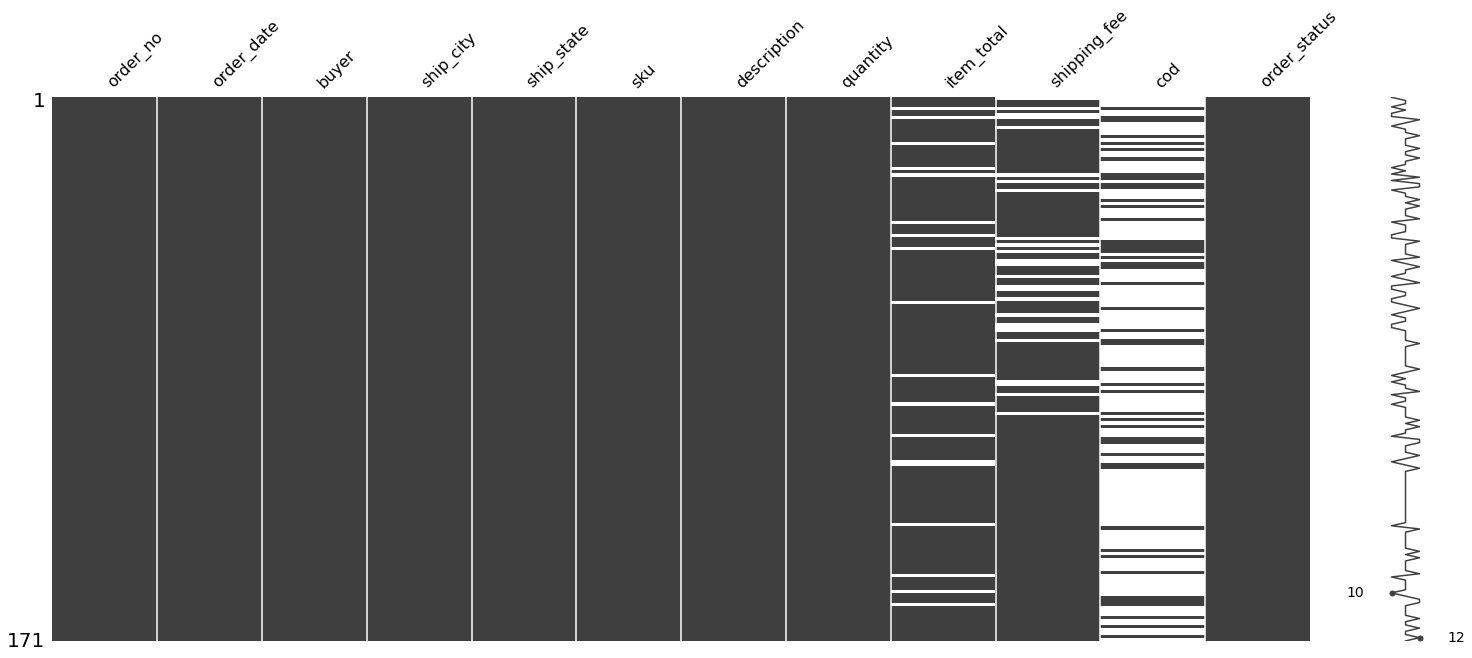

In [4]:
msno.matrix(data)

In [5]:
data['cod'].isna().sum()

124

In [6]:
data['item_total'].isna().sum()

18

In [7]:
data['shipping_fee'].isna().sum()

26

In [8]:
data.pop('order_no')

0      405-9763961-5211537
1      404-3964908-7850720
2      171-8103182-4289117
3      405-3171677-9557154
4      402-8910771-1215552
              ...         
166    171-2829978-1258758
167    402-3045457-5360311
168    408-2260162-8323567
169    403-5664951-8941100
170    402-4845680-8041921
Name: order_no, Length: 171, dtype: object

In [9]:
var = np.nan
data['cod'].replace({'Cash On Delivery': 1, var: 0}, inplace=True)

In [10]:
data['cod']

0      0
1      0
2      0
3      1
4      0
      ..
166    1
167    0
168    0
169    1
170    0
Name: cod, Length: 171, dtype: int64

In [11]:
amounts = ['item_total', 'shipping_fee']
for i in amounts:
    data[i] = data[i].apply(lambda x: str(x).replace(',', ''))
    data[i] = data[i].apply(lambda x: x[1:])

In [12]:
data

,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.00,an,0,Delivered to buyer
1,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,0,Delivered to buyer
2,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,0,Delivered to buyer
3,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,an,an,1,Delivered to buyer
4,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.00,84.96,0,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...
166,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.00,84.96,1,Delivered to buyer
167,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.00,114.46,0,Delivered to buyer
168,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.00,105.02,0,Delivered to buyer
169,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.00,80.24,1,Delivered to buyer


In [13]:
data['item_total'].isna().sum()

0

In [14]:
data['item_total'].value_counts()

449.00     52
399.00     36
an         18
549.00     11
349.00      8
250.00      7
1299.00     7
1099.00     7
649.00      5
475.00      5
175.00      4
1347.00     2
3897.00     2
1499.00     2
200.00      1
898.00      1
499.00      1
899.00      1
1796.00     1
Name: item_total, dtype: int64

In [15]:
data['item_total'].replace({'an':0}, inplace=True)

In [16]:
data['item_total'].value_counts()

449.00     52
399.00     36
0          18
549.00     11
349.00      8
250.00      7
1299.00     7
1099.00     7
649.00      5
475.00      5
175.00      4
1347.00     2
3897.00     2
1499.00     2
200.00      1
898.00      1
499.00      1
899.00      1
1796.00     1
Name: item_total, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_date    171 non-null    object
 1   buyer         171 non-null    object
 2   ship_city     171 non-null    object
 3   ship_state    171 non-null    object
 4   sku           171 non-null    object
 5   description   171 non-null    object
 6   quantity      171 non-null    int64 
 7   item_total    171 non-null    object
 8   shipping_fee  171 non-null    object
 9   cod           171 non-null    int64 
 10  order_status  171 non-null    object
dtypes: int64(2), object(9)
memory usage: 14.8+ KB


In [18]:
data['shipping_fee'].isna().sum()

0

In [19]:
data['shipping_fee'].replace({'an':0}, inplace=True)

In [20]:
data["item_total"] = data["item_total"].astype("float64")

In [21]:
data["shipping_fee"] = data["shipping_fee"].astype("float64")

<AxesSubplot:>

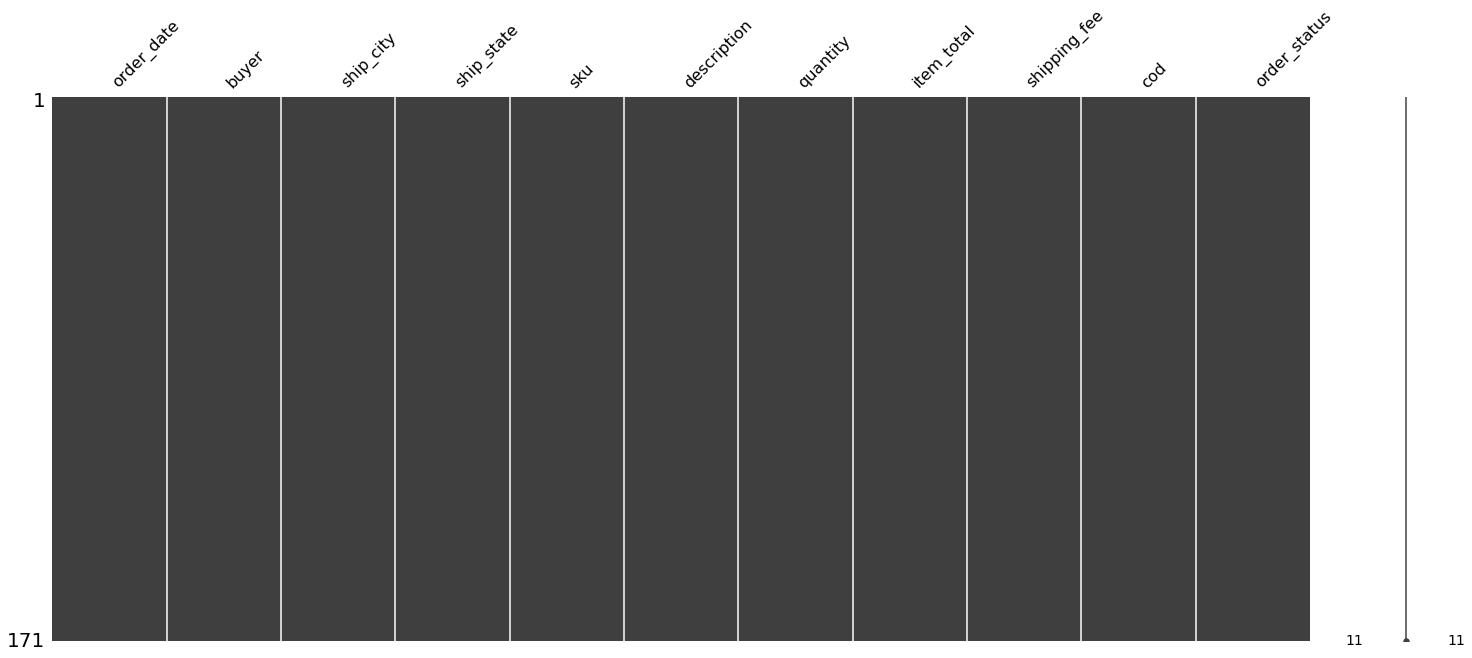

In [22]:
msno.matrix(data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    171 non-null    object 
 1   buyer         171 non-null    object 
 2   ship_city     171 non-null    object 
 3   ship_state    171 non-null    object 
 4   sku           171 non-null    object 
 5   description   171 non-null    object 
 6   quantity      171 non-null    int64  
 7   item_total    171 non-null    float64
 8   shipping_fee  171 non-null    float64
 9   cod           171 non-null    int64  
 10  order_status  171 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 14.8+ KB


## Data Description

- order_no - Unique Amazon Order Number
- order_date - Date on which the order was placed
- buyer - Name of the buyer
- ship_city - Delivery Address City
- ship_state - Delivery Address State
- sku - Unique identifier of a product
- description - Product description
- quantity - Number of units ordered
- item_total - Total amount paid by the buyer
- shipping_fee - Charges borne by Boss Leathers to ship the item
- cod - Mode of payment: Cash on delivery or not

<BarContainer object of 10 artists>

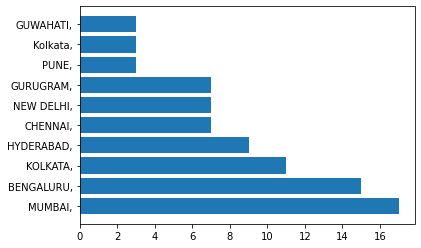

In [24]:
pyplot.barh(data.ship_city.value_counts()[:10].index ,data.ship_city.value_counts()[:10].values )

<AxesSubplot:xlabel='count', ylabel='ship_state'>

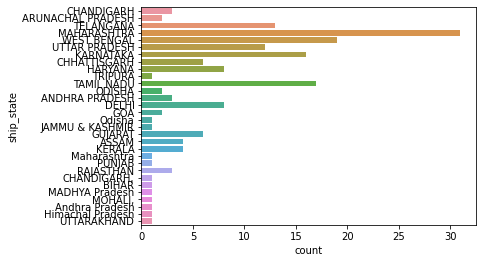

In [25]:
sns.countplot(data = data, y = 'ship_state')

<AxesSubplot:xlabel='count', ylabel='ship_city'>

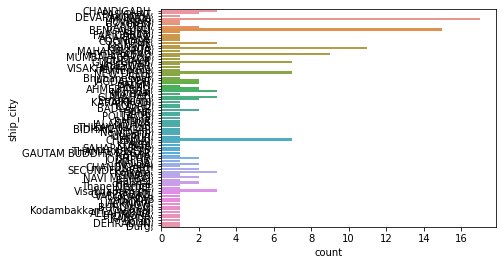

In [28]:
sns.countplot(data = data , y = "ship_city")

<BarContainer object of 4 artists>

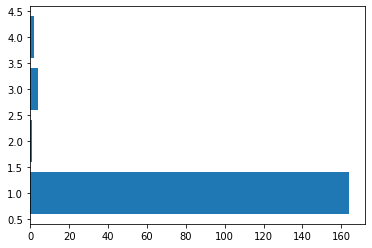

In [31]:
pyplot.barh(data.quantity.value_counts()[:10].index ,data.quantity.value_counts()[:10].values )

<AxesSubplot:>

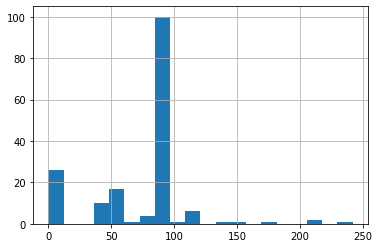

In [32]:
data.shipping_fee.hist(bins = 20)

<AxesSubplot:xlabel='count', ylabel='cod'>

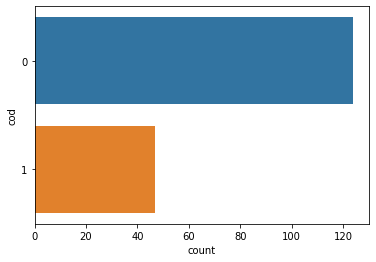

In [33]:
sns.countplot(data = data , y ='cod')

<AxesSubplot:xlabel='count', ylabel='order_status'>

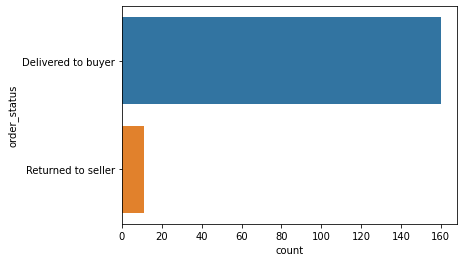

In [34]:
sns.countplot( data = data , y = 'order_status')

<AxesSubplot:xlabel='count', ylabel='order_status'>

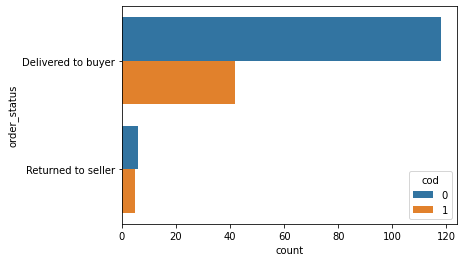

In [35]:
sns.countplot( data = data , y = 'order_status' , hue = 'cod')

In [39]:
data['order_status'].value_counts()

#data['item_total'].replace({'':0}, inplace=True)

Delivered to buyer    160
Returned to seller     11
Name: order_status, dtype: int64

In [40]:
data['order_status'].replace({'Delivered to buyer':1, 'Returned to seller':0}, inplace=True)

In [41]:
data['order_status'].value_counts()

1    160
0     11
Name: order_status, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    171 non-null    object 
 1   buyer         171 non-null    object 
 2   ship_city     171 non-null    object 
 3   ship_state    171 non-null    object 
 4   sku           171 non-null    object 
 5   description   171 non-null    object 
 6   quantity      171 non-null    int64  
 7   item_total    171 non-null    float64
 8   shipping_fee  171 non-null    float64
 9   cod           171 non-null    int64  
 10  order_status  171 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 14.8+ KB


In [43]:
data.pop('order_date')
data.pop('buyer')
data.pop('sku')
data.pop('description')

0      100% Leather Elephant Shaped Piggy Coin Bank |...
1      Women's Set of 5 Multicolor Pure Leather Singl...
2      Women's Set of 5 Multicolor Pure Leather Singl...
3      Pure 100% Leather Block Print Rectangular Jewe...
4      Pure Leather Sling Bag with Multiple Pockets a...
                             ...                        
166    Women's Set of 5 Multicolor Pure Leather Singl...
167    Traditional Block-Printed Women's 100% Pure Le...
168    Traditional Block-Printed Women's 100% Pure Le...
169    Stylish and Sleek Multiple Pockets 100 Percent...
170    100% Leather Elephant Shaped Piggy Coin Bank |...
Name: description, Length: 171, dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_city     171 non-null    object 
 1   ship_state    171 non-null    object 
 2   quantity      171 non-null    int64  
 3   item_total    171 non-null    float64
 4   shipping_fee  171 non-null    float64
 5   cod           171 non-null    int64  
 6   order_status  171 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 9.5+ KB


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
features_interest = ['ship_city', 'ship_state' , 'quantity', 'item_total', 'shipping_fee', 'cod',
       'order_status']

In [51]:
data_ml = data[features_interest]
x = data_ml[features_interest[:-1]]
y = data_ml[features_interest[-1]]

In [52]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,25]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(pd.get_dummies(x), y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_results

,model,best_score,best_params
0,svm,0.935798,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.941513,{'n_estimators': 5}
2,logistic_regression,0.953277,{'C': 5}
